## Detecting Corners and Edges using Convolution

cat:https://www.pexels.com/photo/concrete-structure-2570063/

### Import libraries

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

### Read image

In [2]:
img = Image.open("images/the-gate.jpg").convert('RGB')

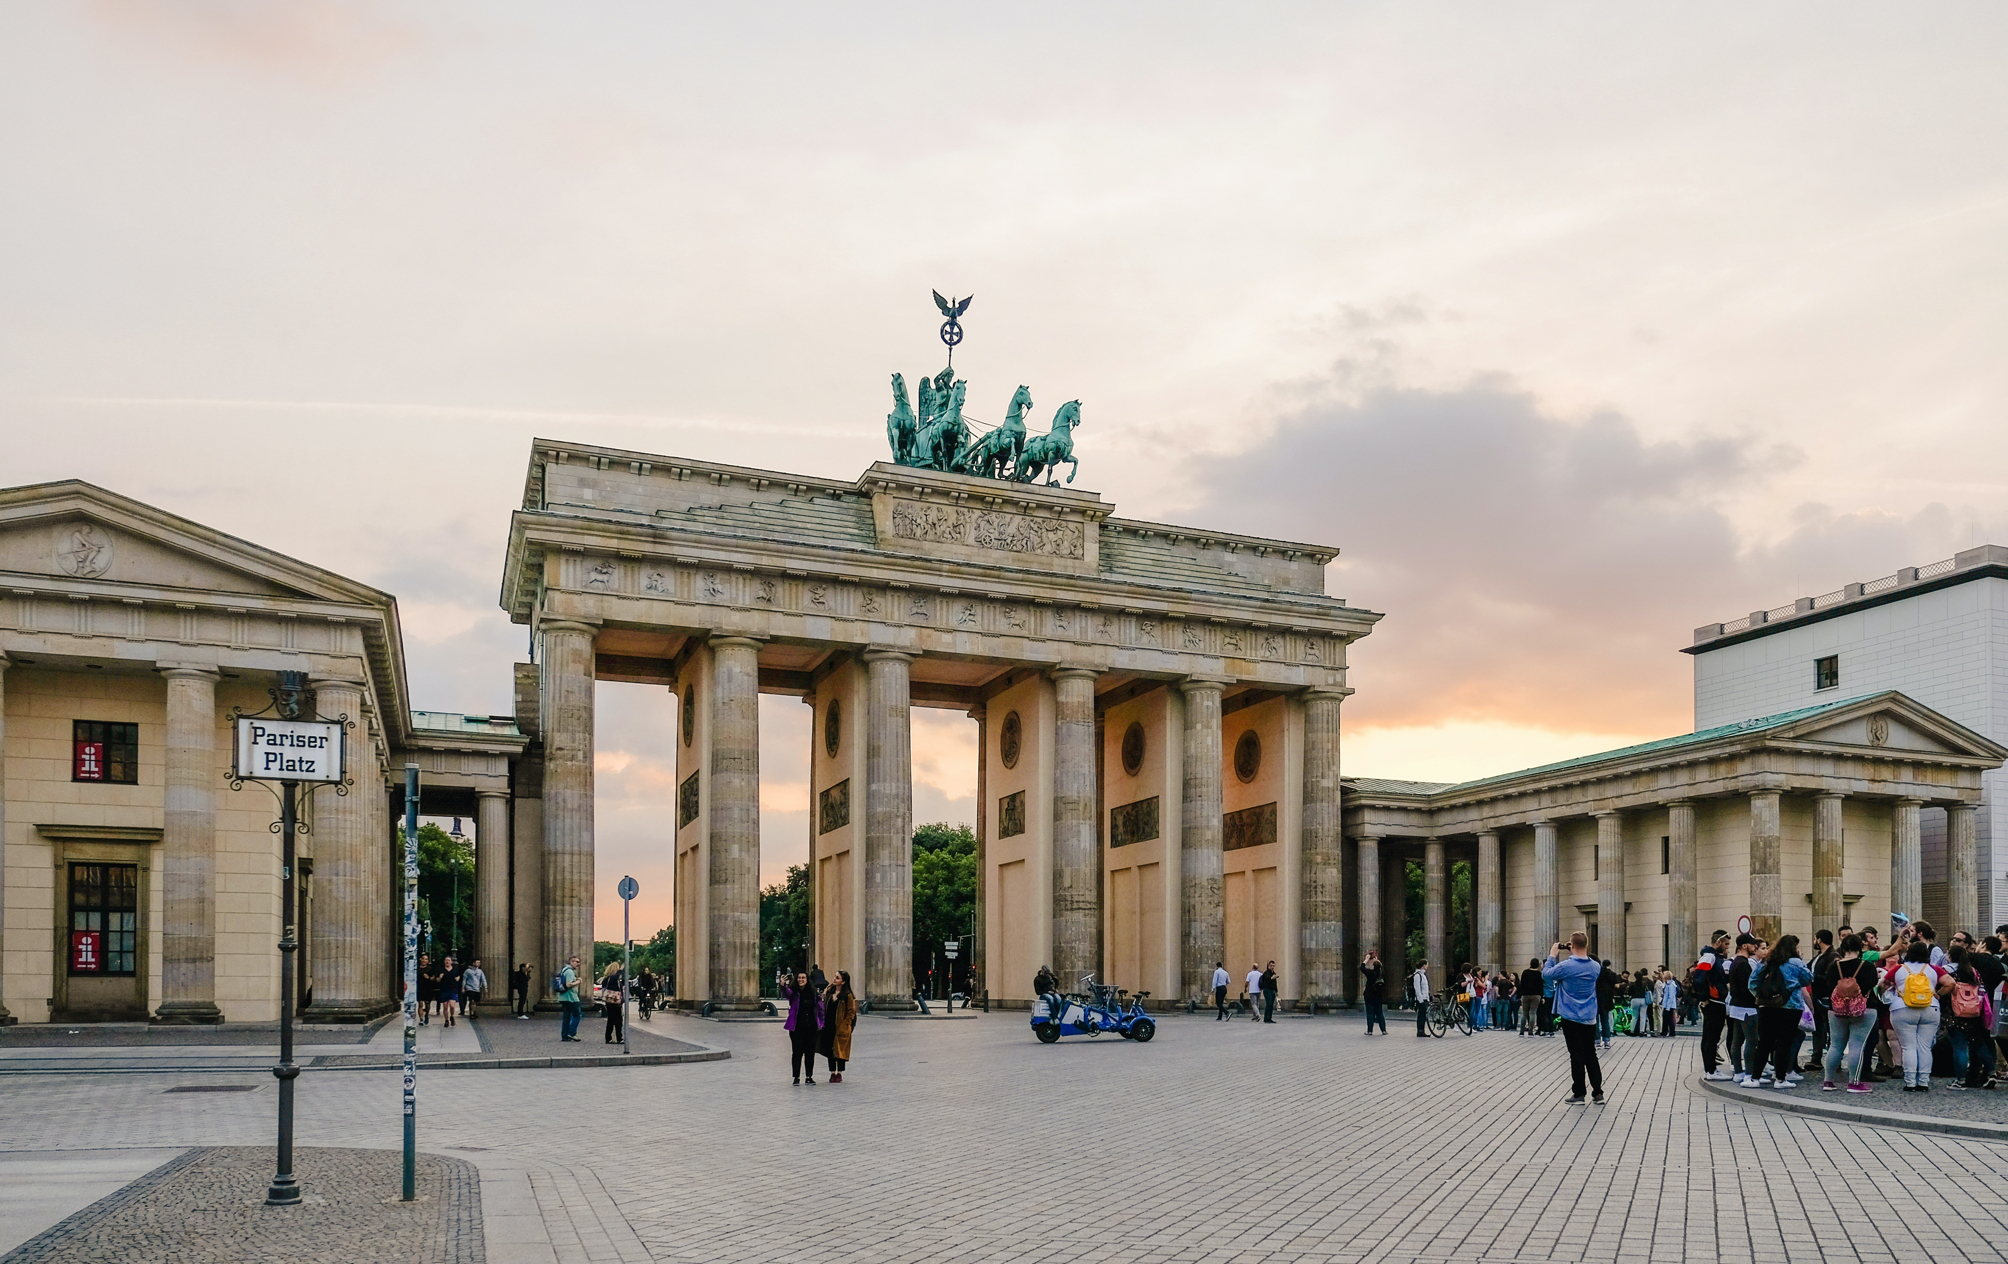

In [3]:
img

### Convert to tensor
* Resize the image and convert to pytorch tensor by applying the transforms

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms as tf

In [5]:
transforms = tf.Compose([tf.Resize(400), 
                        tf.ToTensor()])

In [6]:
img_tensor = transforms(img)

In [7]:
img_tensor

tensor([[[0.8392, 0.8392, 0.8392,  ..., 0.8588, 0.8588, 0.8588],
         [0.8392, 0.8392, 0.8392,  ..., 0.8588, 0.8588, 0.8588],
         [0.8392, 0.8392, 0.8431,  ..., 0.8549, 0.8549, 0.8588],
         ...,
         [0.4824, 0.4118, 0.3647,  ..., 0.4510, 0.4745, 0.6000],
         [0.4000, 0.3725, 0.2863,  ..., 0.5882, 0.4235, 0.4196],
         [0.3686, 0.2392, 0.2353,  ..., 0.5569, 0.5373, 0.3882]],

        [[0.8235, 0.8235, 0.8235,  ..., 0.8431, 0.8392, 0.8431],
         [0.8235, 0.8235, 0.8235,  ..., 0.8431, 0.8431, 0.8431],
         [0.8275, 0.8235, 0.8275,  ..., 0.8431, 0.8431, 0.8431],
         ...,
         [0.4941, 0.4235, 0.3882,  ..., 0.4510, 0.4745, 0.5961],
         [0.4235, 0.4000, 0.3333,  ..., 0.5765, 0.4275, 0.4314],
         [0.3961, 0.2941, 0.2902,  ..., 0.5451, 0.5294, 0.3882]],

        [[0.8118, 0.8118, 0.8118,  ..., 0.8314, 0.8275, 0.8275],
         [0.8118, 0.8118, 0.8118,  ..., 0.8314, 0.8314, 0.8275],
         [0.8118, 0.8118, 0.8157,  ..., 0.8275, 0.8275, 0.

In [8]:
img_tensor.shape

torch.Size([3, 400, 635])

### Defining filter
* Convolution of an image with different filters can perform operations such as edge detection, blur and sharpen by applying filters.
* Filters for sharpen, line and edge detetcion operations are below.

In [9]:
# a 4-dimensional matrix: the number of output channels when the kernel is applied, the number of input channel,
# kernel height, kernel width

sharpen_kernel = [[[[0, -1, 0]], 
                   [[-1, 5, -1]], 
                   [[0, -1, 0]]]]

In [10]:
horizontal_line_kernel = [[[[1, 0, -1]],
                           [[0, 0, 0]],
                           [[-1, 0, 1]]]]

In [11]:
vertical_line_kernel = [[[[0, 1, 0]],
                         [[1, -4, 1]],
                         [[0, 1, 0]]]]

In [12]:
edge_detection_kernel = [[[[-1, -1, -1]],
                          [[-1, 8, -1]],
                          [[-1, -1, -1]]]]

In [13]:
conv_filter = torch.Tensor(sharpen_kernel) 

In [14]:
conv_filter.shape

torch.Size([1, 3, 1, 3])

### Applying filter
* torch.nn.functional.conv2d accepts custom filters as opposed to torch.nn.conv2d which uses the default kernel
* F.conv2d requires a 4d tensor as input. Hence, the unsqueeze operation

In [15]:
img_tensor = img_tensor.unsqueeze(0) # add a dimension of 1 at 0 index

In [16]:
img_tensor.shape

torch.Size([1, 3, 400, 635])

In [17]:
conv_tensor = F.conv2d(img_tensor, conv_filter, padding=0)    

In [18]:
conv_tensor.shape # batch, number of channel, height, width

torch.Size([1, 1, 400, 633])

### Displaying result image
* convert the tensor back to 3d and then to a numpy array for display

In [19]:
conv_img = conv_tensor[0, :, :, :]
conv_img.shape

torch.Size([1, 400, 633])

In [20]:
conv_img = conv_img.numpy().squeeze()
conv_img.shape

(400, 633)

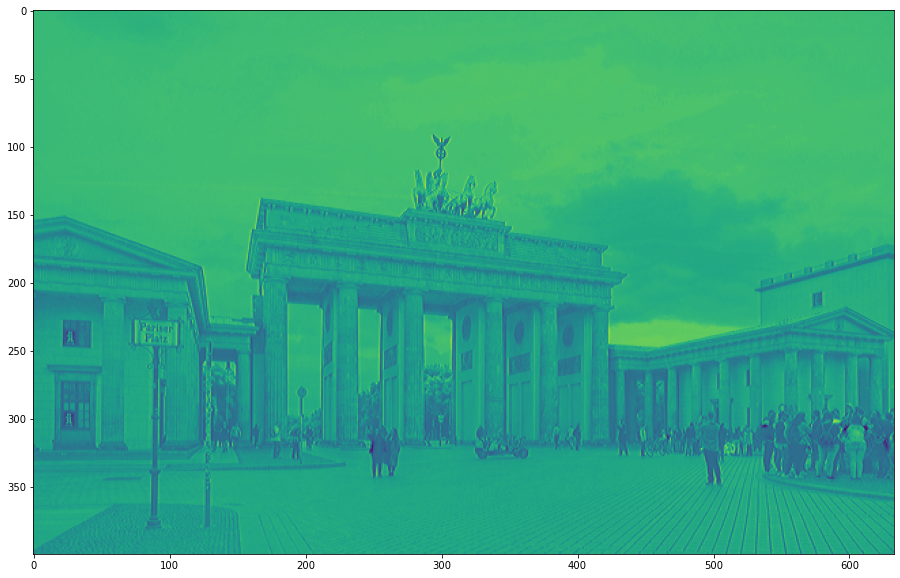

In [21]:
plt.figure(figsize=(20,10))
plt.imshow(conv_img)

In [22]:
pool = nn.MaxPool2d(2, 2)

In [23]:
pool_tensor = pool(conv_tensor)

In [24]:
pool_tensor.shape

torch.Size([1, 1, 200, 316])

In [25]:
pool_img = pool_tensor[0, :, :, :]
pool_img.shape

torch.Size([1, 200, 316])

In [26]:
pool_img = pool_img.numpy().squeeze()
pool_img.shape

(200, 316)

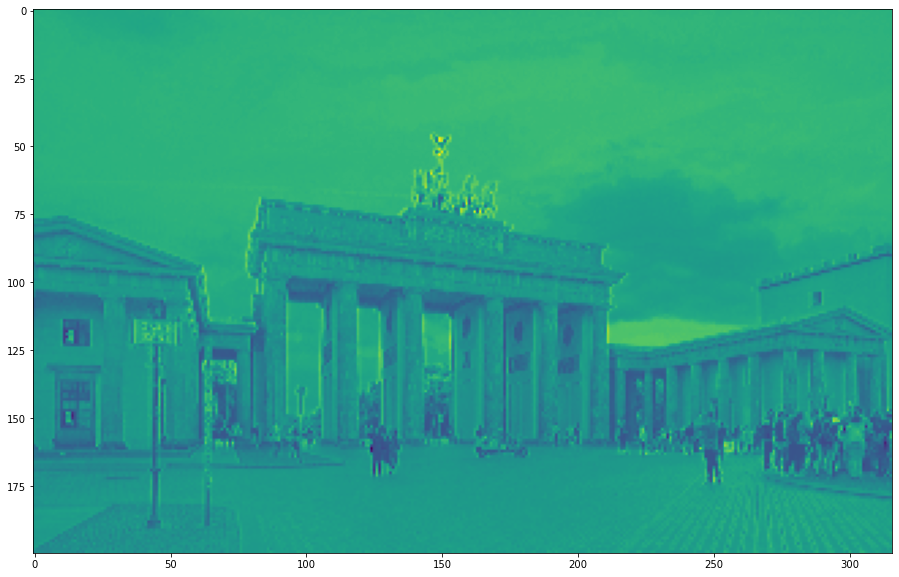

In [27]:
plt.figure(figsize=(20,10))
plt.imshow(pool_img)

In [28]:
# Your turn to try other kernels